<center>
    <img src="https://www.hse.ru/data/2020/11/16/1367273515/HSE_University_blue.png" width=500px/>
    <font> Студенческий кружок<font><br/>
    <br/>
    <br/>
    <b style="font-size: 2em">Инструменты анализа данных</b><br/>
    <br/>
    <font>Нигматуллин Роман, по материалам ШАД</font><br/>
</center>

### План лекции

**Первая часть (~0.5-1h):**
numpy

**Вторая часть (~1h):** 
pandas

За материалы лекций благодарим команду Школы Анализа данных.

# NumPy

[numpy.org/doc/](https://numpy.org/doc/stable/)

Библиотека NumPy предоставляет следующие **возможности**: 
* работать с многомерными массивами (включая матрицы)
* производить быстрое вычисление математических функций на многомерных массивах

Ядром пакета NumPy является объект [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

**Важные отличия** между NumPy arrays и Python sequences: 
* NumPy array имеет фиксированную длину, которая определяется в момент его создания (в отличие от Python lists, которые могут расти динамически)
* Элементы в NumPy array должны быть одного типа
* Можно выполнять операции непосредственно над NumPy arrays

**Сильные стороны** NumPy: 
* Vectorization 
* Broadcasting

**Мотивирующий пример**
![Imgur](https://i.imgur.com/z4GzOX6.png)

In [20]:
import numpy as np

## Способы создания Numpy arrays
* Конвертация из Python structures
* Генерация с помощью встроенных функций
* Чтение с диска


### Конвертация из Python structures

In [21]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

При конвертации можно задавать тип данных с помощью аргумента [dtype](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html): 

In [23]:
np.array([1, 2, 3, 4, 5], dtype=np.float32)

array([1., 2., 3., 4., 5.], dtype=float32)

Аналогичное преобразование:

In [25]:
np.float32([1, 2, 3, 4, 5])

array([1., 2., 3., 4., 5.], dtype=float32)

### Генерация Numpy arrays

* [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) — аналог range из Python, которому можно передать нецелочисленный шаг
* [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) — способ равномерно разбить отрезок на n-1 интервал
* [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html) — способ разбить отрезок по логарифмической шкале
* [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) — создаёт массив заполненный нулями заданной размерности
* [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) — создаёт массив заполненный единицами заданной размерности
* [empty](https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html) — создаёт массив неинициализированный никаким значением заданной размерности

In [5]:
np.arange(0, 5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [6]:
np.linspace(0, 5, 11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [7]:
np.logspace(0, 9, 10, base=2)

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

In [8]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [9]:
np.ones((2, 2))

array([[1., 1.],
       [1., 1.]])

In [14]:
np.empty((2, 2))

array([[5.e-324, 5.e-324],
       [5.e-324, 0.e+000]])

In [2]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

Pазмеры массива хранятся в поле **shape**, а количество размерностей - в **ndim**

In [74]:
array = np.ones((2, 3))
print('Размерность массива - %s, количество размерностей - %d'%(array.shape, array.ndim))

Размерность массива - (2, 3), количество размерностей - 2


Метод [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) позволяет преобразовать размеры массива без изменения данных

In [30]:
array = np.arange(0, 6, 0.5)
array = array.reshape((2, 6))
array

array([[0. , 0.5, 1. , 1.5, 2. , 2.5],
       [3. , 3.5, 4. , 4.5, 5. , 5.5]])

Для того что бы развернуть многомерный массив в вектор, можно воспользоваться функцией [ravel](ravel)

In [31]:
array = np.ravel(array)
array

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

## Индексация

В NumPy работает привычная индексация Python, включая использование отрицательных индексов и срезов

In [48]:
print(array[0])
print(array[-1])
print(array[1:-1])
print(array[1:-1:2])
print(array[::-1])

0.0
5.5
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[0.5 1.5 2.5 3.5 4.5]
[5.5 5.  4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0. ]


**Замечание**: Индексы и срезы в многомерных массивах не нужно разделять квадратными скобками 

т.е. вместо ```matrix[i][j]``` нужно использовать ```matrix[i, j]```

В качестве индексов можно использовать массивы:

In [32]:
array[[0, 2, 4, 6, 8, 10]]

array([0., 1., 2., 3., 4., 5.])

In [55]:
array[[True, False, True, False, True, False, True, False, True, False, True, False]]

array([0., 1., 2., 3., 4., 5.])

In [5]:
x = np.array([[1, 2, 3]])
y = np.array([1, 2, 3])

print x.shape, y.shape

print(np.array_equal(x, y))
print(np.array_equal(x, y[np.newaxis, :]))

(1, 3) (3,)
False
True


In [35]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
x[(x % 2 == 0) & (x > 5)]

array([6, 8])

In [11]:
print(x)
x[x > 3] *= 2
print(x)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  8 10 12 14 16 18]


Для копирования в numpy есть метод copy

In [12]:
x.copy()

array([ 0,  1,  2,  3,  8, 10, 12, 14, 16, 18])

### Чтение данных с помощью функции [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt)

In [36]:
iris = np.genfromtxt('iris_subset.txt', delimiter=',', names=True, dtype=[('sepal_length_in_cm', 'f8'), 
                                                                          ('sepal_width_in_cm', 'f8'), 
                                                                          ('petal_length_in_cm', 'f8'), 
                                                                          ('petal_width_in_cm', 'f8'),
                                                                          ('class', 'U10')])
iris

array([(5.1, 3.5, 1.4, 0.2, 'setosa'), (4.9, 3. , 1.4, 0.2, 'setosa'),
       (4.7, 3.2, 1.3, 0.2, 'setosa'), (4.6, 3.1, 1.5, 0.2, 'setosa'),
       (5. , 3.6, 1.4, 0.2, 'setosa'), (7. , 3.2, 4.7, 1.4, 'versicolor'),
       (6.4, 3.2, 4.5, 1.5, 'versicolor'),
       (6.9, 3.1, 4.9, 1.5, 'versicolor'),
       (5.5, 2.3, 4. , 1.3, 'versicolor'),
       (6.5, 2.8, 4.6, 1.5, 'versicolor'),
       (6.3, 3.3, 6. , 2.5, 'virginica'),
       (5.8, 2.7, 5.1, 1.9, 'virginica'),
       (7.1, 3. , 5.9, 2.1, 'virginica'),
       (6.3, 2.9, 5.6, 1.8, 'virginica'),
       (6.5, 3. , 5.8, 2.2, 'virginica')],
      dtype=[('sepal_length_in_cm', '<f8'), ('sepal_width_in_cm', '<f8'), ('petal_length_in_cm', '<f8'), ('petal_width_in_cm', '<f8'), ('class', '<U10')])

Значения строки можно запросить по индексу, а значения колонки по её названию

In [37]:
print('Описание первого элемента: %s'%iris[0])
print('Значения столбца sepal_length_in_cm: %s'%iris['sepal_length_in_cm'])

Описание первого элемента: (5.1, 3.5, 1.4, 0.2, 'setosa')
Значения столбца sepal_length_in_cm: [5.1 4.9 4.7 4.6 5.  7.  6.4 6.9 5.5 6.5 6.3 5.8 7.1 6.3 6.5]


In [38]:
sepal_length_setosa = iris['sepal_length_in_cm'][iris['class'] == 'setosa']
sepal_length_versicolor = iris['sepal_length_in_cm'][iris['class'] == 'versicolor']

print('Значения слтобца sepal_length_in_cm\n\tclass setosa: %s\n\tclass versicolor: %s'%(sepal_length_setosa, 
                                                                                         sepal_length_versicolor))

Значения слтобца sepal_length_in_cm
	class setosa: [5.1 4.9 4.7 4.6 5. ]
	class versicolor: [7.  6.4 6.9 5.5 6.5]


При чтение данных из файла можно пропускать строки в конце и в начале, используя **skip_header** и **skip_footer**, а также брать только нужные столбцы - **usecols**

In [39]:
iris_class = np.genfromtxt('iris_subset.txt', delimiter=',', skip_header=1, usecols=4, dtype='U10')
iris_class

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype='<U10')

In [40]:
iris_features = np.genfromtxt('iris_subset.txt', delimiter=',', skip_header=1, usecols=range(4))
iris_features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [6.3, 3.3, 6. , 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.5, 3. , 5.8, 2.2]])

In [41]:
features_setosa = iris_features[iris_class == 'setosa']
features_versicolor = iris_features[iris_class == 'versicolor']

Операции в NumPy можно производить непосредственно над векторами одинаковой размерности без использования циклов

Например, вычисление поэлементной разности между векторами выглядит следующим образом:

In [42]:
sepal_length_versicolor - sepal_length_setosa

array([1.9, 1.5, 2.2, 0.9, 1.5])

Аналогично для многомерных массивов

In [43]:
features_versicolor - features_setosa

array([[ 1.9, -0.3,  3.3,  1.2],
       [ 1.5,  0.2,  3.1,  1.3],
       [ 2.2, -0.1,  3.6,  1.3],
       [ 0.9, -0.8,  2.5,  1.1],
       [ 1.5, -0.8,  3.2,  1.3]])

**Замечание:** Все арифметические операции над массивами одинаковой размерности производятся поэлементно

## [Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

Broadcasting снимает правило одной размерности и позволяет производить арифметические операции над массивами разных, но всё-таки согласованных размерностей. Простейшим примером является умножение вектора на число:

![Imgur](https://i.imgur.com/tE3ZCWG.gif)

In [65]:
2*np.arange(1, 4)

array([2, 4, 6])

Правило согласования размерностей выражается в одном предложении: 

```In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one```

Если количество размерностей не совпадают, то к массиву меньшей размерности добавляются фиктивные размерности "слева", например:
```
a  = np.ones((2,3,4))
b = np.ones(4)
c = a * b # here a.shape=(2,3,4) and b.shape is considered to be (1,1,4)
```

Прибавим к каждой строчки матрицы один и тот же вектор:

![Imgur](https://i.imgur.com/VsP2dqT.gif)

In [66]:
np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]]) + np.arange(3)

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Теперь если мы хотим, проделать тот же трюк но со столбцами, то мы не можем просто добавить вектор состоящий из 4 элементов т.к. в данном случае размеры будут не согласованы

![Imgur](https://i.imgur.com/9LvGoeL.gif)

Сначала нужно преоброзовать вектор к виду:

In [72]:
np.arange(4)[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3]])

А затем к нему добавить матрицу:

In [46]:
np.arange(4)[:, np.newaxis]+np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])

array([[ 0,  0,  0],
       [11, 11, 11],
       [22, 22, 22],
       [33, 33, 33]])

Если нужно перемножить многомерные массивы не поэлеметно, а по правилу перемножения матриц, то следует воспользоваться [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)

Транспонирование производится с помощью array**.T**

Так же в NumPy реализованно много полезных операций для работы с массивами: [np.min](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html), [np.max](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html), [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html), [np.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) и т.д.

**Замечание:** В каждой из перечисленных функций есть параметр **axis**, который указывает по какому измерению производить данную операцию. По умолчанию операция производится по всем значениям массива

Например,

In [9]:
print('Среднее значение всех значений класса versicolor: %s'%np.mean(features_versicolor))
print('Среднее значение каждого признака класса versicolor: %s'%np.mean(features_versicolor, axis=1))

Среднее значение всех значений класса versicolor: 3.84
Среднее значение каждого признака класса versicolor: [4.075 3.9   4.1   3.275 3.85 ]


Теперь эффективно посчитаем $\frac{1}{n} \sum\limits_{i=1}^n |x_i-y_i|$ для каждой пары $(x, y)$, где $x$ - вектор признаков объекта из класса setosa, а $y$ - вектор признаков объекта из класса versicolor

In [103]:
np.mean(np.abs(features_setosa - features_versicolor[:, np.newaxis]), axis=2)

array([[1.675, 1.7  , 1.725, 1.725, 1.725],
       [1.5  , 1.525, 1.55 , 1.55 , 1.55 ],
       [1.75 , 1.725, 1.8  , 1.75 , 1.8  ],
       [1.325, 1.25 , 1.375, 1.325, 1.375],
       [1.65 , 1.575, 1.7  , 1.65 , 1.7  ]])

### Операции

In [25]:
x = np.arange(40).reshape(5, 2, 4)
print(x)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]]]


In [24]:
print(x.mean())
print(np.mean(x))

19.5
19.5


In [27]:
x.mean(axis=0)

array([[16., 17., 18., 19.],
       [20., 21., 22., 23.]])

In [29]:
x.mean(axis=1)

array([[ 2.,  3.,  4.,  5.],
       [10., 11., 12., 13.],
       [18., 19., 20., 21.],
       [26., 27., 28., 29.],
       [34., 35., 36., 37.]])

In [30]:
x.mean(axis=2)

array([[ 1.5,  5.5],
       [ 9.5, 13.5],
       [17.5, 21.5],
       [25.5, 29.5],
       [33.5, 37.5]])

In [34]:
x.mean(axis=(0,2))

array([17.5, 21.5])

In [35]:
x.mean(axis=(0,1,2))

19.5

### Конкатенация многомерных массивов

Конкатенировать несколько массивом можно с помощью функций **np.concatenate, np.hstack, np.vstack, np.dstack**

In [47]:
x = np.arange(10).reshape(5, 2)
y = np.arange(100, 120).reshape(5, 4)

In [48]:
x

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [49]:
y

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111],
       [112, 113, 114, 115],
       [116, 117, 118, 119]])

In [50]:
np.hstack((x, y))

array([[  0,   1, 100, 101, 102, 103],
       [  2,   3, 104, 105, 106, 107],
       [  4,   5, 108, 109, 110, 111],
       [  6,   7, 112, 113, 114, 115],
       [  8,   9, 116, 117, 118, 119]])

In [51]:
z = np.arange(1000, 1020).reshape(10, 2)

In [56]:
z

array([[1000, 1001],
       [1002, 1003],
       [1004, 1005],
       [1006, 1007],
       [1008, 1009],
       [1010, 1011],
       [1012, 1013],
       [1014, 1015],
       [1016, 1017],
       [1018, 1019]])

In [53]:
p = np.arange(1).reshape([1, 1, 1, 1])
p

array([[[[0]]]])

In [57]:
print("vstack: ", np.vstack((p, p)).shape)
print("hstack: ", np.hstack((p, p)).shape)
print("dstack: ", np.dstack((p, p)).shape)

('vstack: ', (2, 1, 1, 1))
('hstack: ', (1, 2, 1, 1))
('dstack: ', (1, 1, 2, 1))


In [61]:
np.concatenate((p, p), axis=3).shape

(1, 1, 1, 2)

### Типы

In [62]:
x = [1, 2, 70000]

In [63]:
np.array(x, dtype=np.float128)

array([1.e+00, 2.e+00, 7.e+04], dtype=float128)

In [64]:
np.array(x, dtype=np.uint16)

array([   1,    2, 4464], dtype=uint16)

In [65]:
np.array(x, dtype=np.unicode_)

array([u'1', u'2', u'70000'], dtype='<U5')

### Функциональное программирование

In [66]:
def f(value):
    return np.sqrt(value)

vf = np.vectorize(f)

In [73]:
vf(np.arange(10))

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

# Pandas

[pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)

Подключаем библиотеку Pandas, предназначенную для считывания, предобработки и быстрой визуализации данных, а также для простой аналитики.

In [57]:
import pandas as pd
df = pd.read_csv("titanic.csv")

In [58]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
df[["Sex", "Cabin"]].describe()

,Sex,Cabin
count,156,31
unique,2,28
top,male,C123
freq,100,2


### Срезы в DataFrame

### Индексация

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [60]:
df.sort_values("Age", inplace=True)

In [62]:
df.iloc[78]

PassengerId                   353
Survived                        0
Pclass                          3
Name           Elias, Mr. Tannous
Sex                          male
Age                          15.0
SibSp                           1
Parch                           1
Ticket                       2695
Fare                       7.2292
Cabin                         NaN
Embarked                        C
Name: 352, dtype: object

In [63]:
df.loc[78]

PassengerId                               79
Survived                                   1
Pclass                                     2
Name           Caldwell, Master. Alden Gates
Sex                                     male
Age                                     0.83
SibSp                                      0
Parch                                      2
Ticket                                248738
Fare                                    29.0
Cabin                                    NaN
Embarked                                   S
Name: 78, dtype: object

In [64]:
df.loc[[78, 79, 100], ["Age", "Cabin"]]

,Age,Cabin
78,0.83,NaN
79,30.00,NaN
100,28.00,NaN


Если хотите модифицировать данные среза, не меняя основной таблицы, нужно сделать копию.

In [123]:
df_slice_copy = df.loc[[78, 79, 100], ["Age", "Cabin"]].copy()

In [124]:
df_slice_copy[:] = 3

In [125]:
df_slice_copy

,Age,Cabin
78,3,3
79,3,3
100,3,3


Если хотите менять основную таблицу, то используйте loc

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [187]:
some_slice = df["Age"].isin([20, 25,30])
df.loc[some_slice, "Fare"] = df.loc[some_slice, "Fare"] * 10

Так лучше не делать:

In [188]:
slice_df = df[some_slice]
slice_df["Fare"] = slice_df["Fare"] * 10

/Users/klunev/pyenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Получить значения только нужных столбцов можно передав в ```[]``` название столбца (или список названий столбцов).

**Замечание:** Если передаём название одного столбца, то получаем объект класса [pandas.Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html), а если список названий столбцов, то получаем  [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), чтобы получить [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) обратитесь к полю **values**.

Series и DataFrame имеют много общих методов

In [95]:
df["Age"].head(5)

78     0.83
119    2.00
7      2.00
16     2.00
43     3.00
Name: Age, dtype: float64

In [96]:
df[["Age"]].head(5)

,Age
78,0.83
119,2.00
7,2.00
16,2.00
43,3.00


### pd.Series

Одномерные срезы датафреймов имеют тип pd.Series.

Можно получить np.array из pd.Series, но вы не хотите этого делать.

In [97]:
df["Age"].head(5).values

array([0.83, 2.  , 2.  , 2.  , 3.  ])

Можно достать и индекс

In [99]:
df["Age"].head(5).index

Int64Index([78, 119, 7, 16, 43], dtype='int64')

Создаются они примерно также, как np.array. Опционально указывается индекс

In [104]:
pd.Series([1, 2, 3], index=["Red", "Green", "Blue"])

Red      1
Green    2
Blue     3
dtype: int64

In [107]:
pd.Series(1, index=["Red", "Green", "Blue"])

Red      1
Green    1
Blue     1
dtype: int64

In [110]:
pd.Series([[1, 2, 3]], index=["Red", "Green", "Blue"])

Red      [1, 2, 3]
Green    [1, 2, 3]
Blue     [1, 2, 3]
dtype: object

Series можно перевести в DataFrame

In [113]:
s = pd.Series([1, 2, 3], index=["Red", "Green", "Blue"])
s.to_frame("Values")

,Values
Red,1
Green,2
Blue,3


In [114]:
s.loc["Red"]

1

In [115]:
s.iloc[0]

1

### [Объединение таблиц](http://pandas.pydata.org/pandas-docs/stable/merging.html)

In [130]:
df1 = df[["Age", "Parch"]].copy()
df2 = df[["Ticket", "Fare"]].copy()

In [132]:
df1.join(df2).head(5)

,Age,Parch,Ticket,Fare
78,0.83,2,248738,29.0000
119,2.00,2,347082,31.2750
7,2.00,1,349909,21.0750
16,2.00,1,382652,29.1250
43,3.00,2,SC/Paris 2123,41.5792


In [133]:
df1 = df[["Age", "Parch", "PassengerId"]].copy()
df2 = df[["Ticket", "Fare", "PassengerId"]].copy()

In [135]:
pd.merge(df1, df2, on=["PassengerId"]).head(5)

,Age,Parch,PassengerId,Ticket,Fare
0,0.83,2,79,248738,29.0000
1,2.00,2,120,347082,31.2750
2,2.00,1,8,349909,21.0750
3,2.00,1,17,382652,29.1250
4,3.00,2,44,SC/Paris 2123,41.5792


In [136]:
pd.merge(df1, df2, on=["PassengerId"], how="inner").head(5)

,Age,Parch,PassengerId,Ticket,Fare
0,0.83,2,79,248738,29.0000
1,2.00,2,120,347082,31.2750
2,2.00,1,8,349909,21.0750
3,2.00,1,17,382652,29.1250
4,3.00,2,44,SC/Paris 2123,41.5792


### Группировка

In [190]:
print("Pclass 1: ", df[df["Pclass"] == 1]["Age"].mean())
print("Pclass 2: ", df[df["Pclass"] == 2]["Age"].mean())
print("Pclass 3: ", df[df["Pclass"] == 3]["Age"].mean())

('Pclass 1: ', 38.111111111111114)
('Pclass 2: ', 28.114827586206893)
('Pclass 3: ', 24.307142857142857)


In [72]:
df.groupby(["Pclass"])[["Age"]].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [73]:
df.groupby(["Survived", "Pclass"])

In [76]:
df.groupby(["Survived", "Pclass"])["PassengerId"].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

In [77]:
df.groupby(["Survived", "Pclass"])[["PassengerId", "Cabin"]].count()

PassengerId  Cabin
Survived Pclass                    
0        1                80     59
         2                97      3
         3               372      6
1        1               136    117
         2                87     13
         3               119      6

In [144]:
df.groupby(["Survived", "Pclass"])[["PassengerId", "Fare"]].describe()

PassengerId                                             \
                      count        mean        std   min    25%    50%   
Survived Pclass                                                          
0        1             18.0   82.555556  44.501450   7.0  40.75   88.5   
         2             16.0  107.187500  44.842270  21.0  72.50  122.0   
         3             68.0   80.161765  43.375352   1.0  46.75   84.0   
1        1             12.0   60.083333  50.118874   2.0  21.00   54.5   
         2             14.0   62.000000  39.240874  10.0  27.50   58.0   
         3             28.0   71.607143  45.525198   3.0  32.00   72.0   

                                Fare                                 \
                    75%    max count       mean        std      min   
Survived Pclass                                                       
0        1       117.00  156.0  18.0  80.035183  66.109719  27.7208   
         2       145.25  151.0  16.0  26.243225  20.039973  10.5000   
         3       114.25  155.0  68.0  13.545954   9.905474   6.7500   
1        1        91.25  152.0  12.0  78.702075  66.649342  26.2833   
         2        83.50  134.0  14.0  20.707143   9.671110  10.5000   
         3       108.50  147.0  28.0  13.182889  10.400539   7.1417   

                                                           
                       25%       50%        75%       max  
Survived Pclass                                            
0        1       51.896875  61.27710  78.721875  263.0000  
         2       12.881250  21.00000  27.017700   73.5000  
         3        7.895800   8.05000  15.309350   46.9000  
1        1       35.500000  64.97915  77.546900  263.0000  
         2       13.000000  19.50000  27.312500   41.5792  
         3        7.768750   7.97710  15.396850   56.4958

### Работа с timestamp'ами

In [85]:
tdf = df.copy()
tdf["ts"] = range(1560000000, 1560000000 + tdf.shape[0])

In [86]:
tdf.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ts
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,1560000000
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,1560000001


In [87]:
tdf["ts"] = pd.to_datetime(tdf["ts"], unit="s")

In [88]:
tdf.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ts
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,2019-06-08 13:20:00
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,2019-06-08 13:20:01


In [89]:
tdf.set_index("ts", inplace=True)

In [90]:
tdf.resample("15s").sum()

/var/folders/r9/5px6351n6fx3yqdywn2tdlqs14pvmr/T/ipykernel_43230/3739912023.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tdf.resample("15s").sum()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
ts,,,,,,,
2019-06-08 13:20:00,7443,12,38,14.17,23,22,498.7750
2019-06-08 13:20:15,4458,8,38,36.00,29,19,502.1542
2019-06-08 13:20:30,6902,12,39,66.00,23,20,419.3041
2019-06-08 13:20:45,6875,4,42,119.00,39,23,439.0958
2019-06-08 13:21:00,6561,9,39,176.00,22,17,544.4084
2019-06-08 13:21:15,5707,5,42,229.50,15,8,462.3127
2019-06-08 13:21:30,7317,7,35,245.00,7,7,438.5625
2019-06-08 13:21:45,6412,5,37,262.00,9,6,364.0916
2019-06-08 13:22:00,8443,8,35,270.00,7,8,803.5459


In [91]:
tdf.resample("1T").sum()

/var/folders/r9/5px6351n6fx3yqdywn2tdlqs14pvmr/T/ipykernel_43230/2046292963.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tdf.resample("1T").sum()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
ts,,,,,,,
2019-06-08 13:20:00,25678,36,157,235.17,114,84,1859.3291
2019-06-08 13:21:00,25997,26,153,912.50,53,38,1809.3752
2019-06-08 13:22:00,27608,20,153,1137.50,19,14,1682.2459
2019-06-08 13:23:00,23702,18,149,1305.00,18,14,1905.1040
2019-06-08 13:24:00,29004,24,139,1456.00,25,23,1971.1583
2019-06-08 13:25:00,26670,24,143,1623.00,17,9,1399.4456
2019-06-08 13:26:00,24888,23,139,1783.00,19,13,1685.3333
2019-06-08 13:27:00,30140,26,141,1963.50,22,12,1331.7165
2019-06-08 13:28:00,25660,27,112,2180.50,20,25,3881.0124


### Rolling функции

In [95]:
tdf.sort_index(inplace=True)
tdf.head(10)[["Fare"]]

,Fare
ts,
2019-06-08 13:20:00,8.5167
2019-06-08 13:20:01,14.5000
2019-06-08 13:20:02,19.2583
2019-06-08 13:20:03,19.2583
2019-06-08 13:20:04,29.0000
2019-06-08 13:20:05,18.7500
2019-06-08 13:20:06,151.5500
2019-06-08 13:20:07,37.0042
2019-06-08 13:20:08,15.7417


In [96]:
tdf[["Fare"]].rolling(window=5).mean().head(20)

,Fare
ts,
2019-06-08 13:20:00,NaN
2019-06-08 13:20:01,NaN
2019-06-08 13:20:02,NaN
2019-06-08 13:20:03,NaN
2019-06-08 13:20:04,18.10666
2019-06-08 13:20:05,20.15332
2019-06-08 13:20:06,47.56332
2019-06-08 13:20:07,51.11250
2019-06-08 13:20:08,50.40918


Удобно делать вместе с groupby

In [175]:
rol = tdf[["Sex", "Fare"]].groupby(["Sex"]).rolling(window=5).mean()

In [178]:
rol.head(10)

Sex      Fare
Sex    ts                                   
female 2019-06-08 13:20:01  female       NaN
       2019-06-08 13:20:04  female       NaN
       2019-06-08 13:20:06  female       NaN
       2019-06-08 13:20:07  female       NaN
       2019-06-08 13:20:09  female  27.67584
       2019-06-08 13:20:10  female  28.29584
       2019-06-08 13:20:13  female  25.99416
       2019-06-08 13:20:14  female  24.22500
       2019-06-08 13:20:15  female  20.92334
       2019-06-08 13:20:16  female  19.59918

In [181]:
rol[rol["Sex"] == "male"].head(10)

Sex      Fare
Sex  ts                                 
male 2019-06-08 13:20:00  male       NaN
     2019-06-08 13:20:02  male       NaN
     2019-06-08 13:20:03  male       NaN
     2019-06-08 13:20:05  male       NaN
     2019-06-08 13:20:08  male  29.35750
     2019-06-08 13:20:11  male  32.93750
     2019-06-08 13:20:12  male  30.97084
     2019-06-08 13:20:18  male  26.98918
     2019-06-08 13:20:19  male  28.28418
     2019-06-08 13:20:25  male  22.64668

### Работа со строками

In [97]:
df["Name"].str.lower()\
          .str.replace(",", " ")\
          .str.split(".").str[1]\
          .head(10)

803     assad alexander
755               viljo
644             eugenie
469      helene barbara
78          alden gates
831       george sibley
305       hudson trevor
827               andre
381      maria ("mary")
164        eino viljami
Name: Name, dtype: object

### Работа с NaN'ами

In [212]:
df["Cabin"].head(15)

78     NaN
119    NaN
7      NaN
16     NaN
43     NaN
63     NaN
10      G6
58     NaN
50     NaN
24     NaN
147    NaN
59     NaN
125    NaN
9      NaN
14     NaN
Name: Cabin, dtype: object

In [213]:
df["Cabin"].dropna().head(15)

10              G6
27     C23 C25 C27
136            D47
102            D26
151             C2
88     C23 C25 C27
97         D10 D12
118        B58 B60
139            B86
75           F G73
23              A6
66             F33
123           E101
21             D56
3             C123
Name: Cabin, dtype: object

In [215]:
df["Cabin"].fillna(3).head(5)

78     3
119    3
7      3
16     3
43     3
Name: Cabin, dtype: object

In [216]:
df["Cabin"].fillna(method="bfill").head(15)

78              G6
119             G6
7               G6
16              G6
43              G6
63              G6
10              G6
58     C23 C25 C27
50     C23 C25 C27
24     C23 C25 C27
147    C23 C25 C27
59     C23 C25 C27
125    C23 C25 C27
9      C23 C25 C27
14     C23 C25 C27
Name: Cabin, dtype: object

In [218]:
pd.isna(df["Cabin"]).head(10)

78      True
119     True
7       True
16      True
43      True
63      True
10     False
58      True
50      True
24      True
Name: Cabin, dtype: bool

### Визуализация

<AxesSubplot: xlabel='ts'>

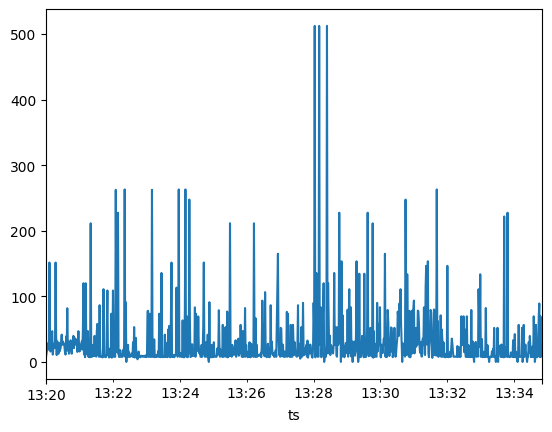

In [100]:
%matplotlib inline

tdf["Fare"].plot()

<AxesSubplot: xlabel='ts'>

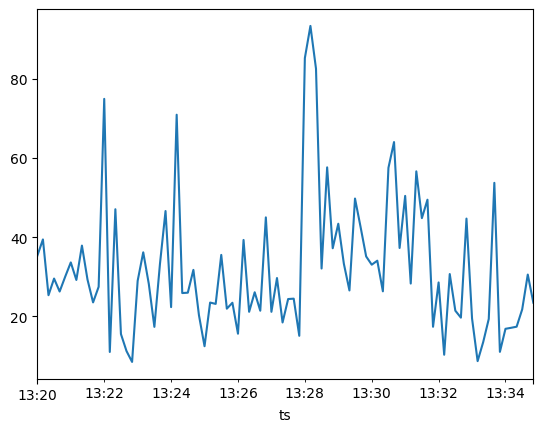

In [105]:
tdf["Fare"].resample("10s").mean().plot()

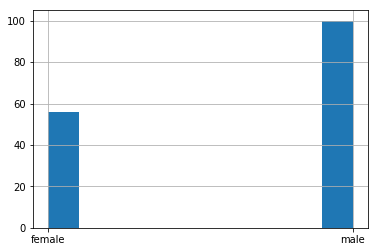

In [227]:
tdf["Sex"].hist()